In [12]:
'''
  Create a network, G, with 100 nodes (numbered 0 - 99) and an average connectivity of 3.
  We seed the graph, so that it produces the same connectivity each time.
  This network will mimic a real-world environment, simulating a road network.

  *Code to create and visualize the network is based on code provided by Professor Pears.
'''
from networkx.classes.function import path_weight
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

seed = 1000                                            # seed the graph for reproducibility  
G = nx.gnp_random_graph (100, .03, seed = seed)        # create a random binomial graph with 100 nodes and an average connectivity of 100 * .03 = 3
print( G.nodes())                                      # print the nodes to visualize the network

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [13]:
'''
  Run a loop to ensure all nodes are accessible to each other.
  We cannot have disjoint graphs, or else we might not be able to travel from one random node to another.
'''
unconnected_nodes = []                                # create an empty list to store all nodes with no edges

for node in nx.generate_adjlist(G):                   # loop through every node in the adjacency list
    if len(node) <= 2:                                # adjlist returns a string, so if the length is <= 2, there is only the parent node, no connections
      unconnected_nodes.append(node)                  # add all nodes without connections to the list

for un in unconnected_nodes:                          # loop through every unconnected node in the list
  temp_node = random.randint(0,99)                    # randomly generate a node to connect to 
  while temp_node == int(un):                         # make sure we do not return the same number, otherwise the node will connect with itself
    temp_node = random.randint(0,99)
  G.add_edge(int(un), temp_node)                      # create an edge between the unconnected node and a random new node

print(G.edges())                                      # print the edges to see the network connectivity

[(0, 23), (0, 35), (0, 54), (1, 25), (1, 44), (2, 22), (2, 59), (3, 90), (4, 47), (4, 56), (4, 82), (5, 7), (5, 50), (5, 80), (6, 30), (6, 68), (6, 69), (6, 75), (7, 13), (7, 16), (7, 29), (7, 38), (8, 47), (8, 56), (9, 65), (9, 87), (9, 92), (10, 16), (11, 56), (11, 41), (12, 19), (12, 29), (12, 45), (13, 37), (14, 55), (14, 64), (14, 65), (14, 70), (15, 41), (15, 97), (15, 49), (16, 44), (16, 73), (17, 45), (17, 75), (17, 71), (18, 24), (18, 34), (18, 45), (18, 58), (18, 85), (19, 29), (19, 55), (19, 93), (20, 24), (20, 71), (21, 24), (22, 25), (23, 53), (23, 90), (24, 39), (24, 47), (24, 80), (24, 93), (24, 98), (25, 26), (25, 35), (25, 39), (25, 47), (25, 74), (26, 35), (26, 39), (26, 45), (26, 61), (27, 56), (28, 34), (28, 53), (28, 54), (29, 30), (29, 48), (29, 60), (29, 71), (29, 61), (30, 61), (31, 78), (31, 99), (32, 45), (32, 46), (32, 67), (33, 36), (34, 47), (34, 51), (34, 80), (34, 81), (34, 92), (34, 95), (35, 71), (35, 78), (35, 85), (36, 45), (36, 62), (36, 87), (37, 43

In [14]:
'''
  Create random edge weights on a scale 1-20, and assign them to the graph.
  The edge weights represent the time in minutes to travel between nodes. 
'''
for (u, v) in G.edges():                                      # iterate through every edge in the network
    eweights=G.edges[u,v]['weight'] = random.randint(1,20)    # assign random weights to edges on a scale 1-20
    print(u,v,eweights)                                       # print the edges to visualize the network

0 23 5
0 35 7
0 54 15
1 25 6
1 44 16
2 22 12
2 59 5
3 90 11
4 47 13
4 56 6
4 82 10
5 7 2
5 50 8
5 80 9
6 30 14
6 68 4
6 69 7
6 75 17
7 13 3
7 16 5
7 29 8
7 38 8
8 47 10
8 56 18
9 65 16
9 87 19
9 92 13
10 16 10
11 56 3
11 41 16
12 19 8
12 29 12
12 45 13
13 37 15
14 55 3
14 64 1
14 65 18
14 70 7
15 41 13
15 97 6
15 49 9
16 44 11
16 73 10
17 45 10
17 75 8
17 71 20
18 24 1
18 34 7
18 45 9
18 58 1
18 85 3
19 29 9
19 55 20
19 93 15
20 24 10
20 71 7
21 24 4
22 25 5
23 53 16
23 90 2
24 39 7
24 47 17
24 80 4
24 93 8
24 98 16
25 26 10
25 35 3
25 39 20
25 47 1
25 74 11
26 35 6
26 39 12
26 45 20
26 61 8
27 56 15
28 34 11
28 53 5
28 54 15
29 30 17
29 48 9
29 60 15
29 71 12
29 61 19
30 61 18
31 78 15
31 99 8
32 45 17
32 46 16
32 67 13
33 36 19
34 47 2
34 51 15
34 80 20
34 81 18
34 92 4
34 95 8
35 71 2
35 78 18
35 85 16
36 45 18
36 62 20
36 87 3
37 43 8
37 78 5
37 83 7
37 86 5
38 43 16
38 59 3
38 63 2
38 78 15
38 50 4
39 42 7
39 48 6
40 96 18
42 57 14
42 66 2
42 75 19
42 97 13
43 56 1
43 58 10
43 98 

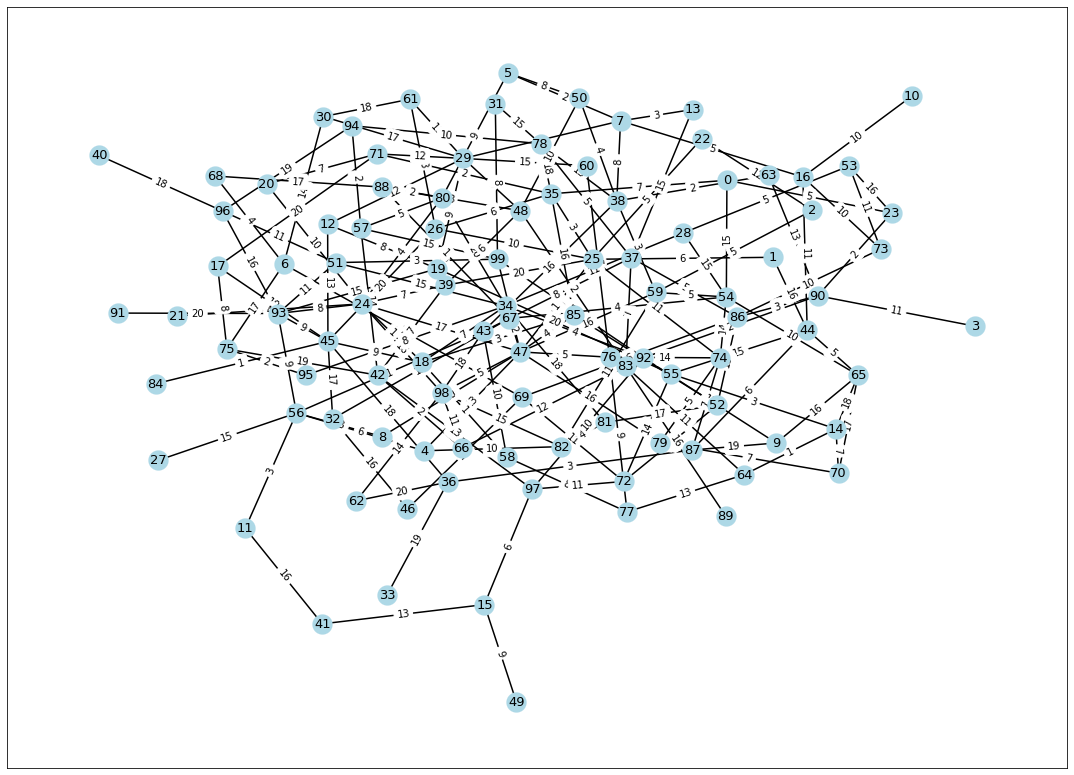

In [15]:
'''
  Display a visualization of the "road map" network.
'''

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G) 
fig = plt.figure(1, figsize=(19, 14))                                                           # make the canvas large enough to fit 100 nodes
nx.draw_networkx_nodes(G, pos, node_size = 400, node_color = 'lightblue', linewidths = 0.2)     # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=1.5)                                       # draw edges

nx.draw_networkx_labels(G, pos, font_size=13, font_family="sans-serif")                         # node labels
edge_labels = nx.get_edge_attributes(G, "weight")                                               # edge weight labels

nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()                                                                                      # display the network

In [16]:
'''
  Create two copies of network G, G1 and G2
  G1 and G2 will be used to store temporary edge weight changes for alternating 15 minute intervals
  G will be preserved with original weights 
'''
G1 = G.copy()
G2 = G.copy()

In [17]:
'''
  Create a dictionary, Traffic.
  Traffic stores the base load traffic levels for each hour, as provided in the program specification.
  We reordered the table to begin with 12:00 midnight, since that will be the order of new navigation requests.
'''
Traffic = {'12 am':  0.10,
            '1 am':  0.10,
            '2 am':  0.10,
            '3 am':  0.15,
            '4 am':  0.25,
            '5 am':  0.30,
            '6 am':  0.65,
            '7 am':  0.85,
            '8 am':  1.00,
            '9 am':  0.95,
           '10 am':  0.90,
           '11 am':  0.90,
           '12 pm':  0.90,
            '1 pm':  0.90,
            '2 pm':  0.95,
            '3 pm':  0.95,
            '4 pm':  0.90,
            '5 pm':  1.00,
            '6 pm':  1.00,
            '7 pm':  0.85,
            '8 pm':  0.70,
            '9 pm':  0.60,
           '10 pm':  0.45,
           '11 pm':  0.30,}

In [18]:
'''
  Create a class, Car, to represent each car on the network.
  Each Car needs to store it's:
    current shortest path,        P
    first unvisited node in path, N
    destination node,             D
    total drive time,             TDT
    total path weight,            TPW
    time to next node,            TNN
    percent of road left,         PRL
'''
class Car:
  def __init__(self, P, N, D, TPW, TNN):
    self.P = P
    self.N = N
    self.D = D
    self.TDT = 0
    self.TPW = TPW
    self.TNN = TNN
    self.PRL = 1

In [19]:
'''
  Create a list to store all car objects, All_Cars.
  Having all cars grouped in a list will allow us to iterate through them to see if we should search for a new path.
  
  Create a variable to store the total time driven across all cars, TDT_all
'''
All_Cars = []
TDT_all = 0

In [20]:
'''
  Function to create new car objects.
  The function will randomly generate a starting node and destination node within the network,
  then use the A* shortest path algorithm to find the shortest path between them.
  The total path weight will be the sum of all the edges, and the time to the next node
  will be the weight of the starting node to the next node in the path.
  The Car constructor will be called to create the object.
  Finally, add the new Car to the All_Cars list.
'''

def Create_Car(All_Cars):
  #Calculate all values for a new navigation request
  start = random.randint(0, 99)
  end   = random.randint(0, 99)

  #Loop to ensure start and end node are not the same
  while start == end:
    end = random.randint(0, 99)

  #Find the shortest path between two nodes using A* algorithm
  try:
    path  = nx.astar_path(g, start, end, weight = 'weight')
  except:
      #Calculate all values for a new navigation request
      start = random.randint(0, 99)
      end   = random.randint(0, 99)

      #Loop to ensure start and end node are not the same
      while start == end:
        end = random.randint(0, 99)
      path  = nx.astar_path(g, start, end, weight = 'weight')
  
  pw    = path_weight(g, path, weight = 'weight')
  tnn   = g[path[0]][path[1]]['weight']

  #Use the constructor to create a new Car object
  Car_Temp = Car(path, start, end, pw, tnn)

  #Add the new car to the All_Cars list
  All_Cars.append(Car_Temp)


In [21]:
'''
  Function to calculate p and determine new edge weights for each 15 minute interval.
  p is calculated using a normal distribution with a mean average of 0 and standard deviation of 0.25.
  New edge weights are calculated by adding the original edge weight with the percent change.
  The percent change is calculated by (p * base load factor * original edge weight)
'''

def Change_Edge_Weights(g, base):
  mean = 0
  standard_deviation = 0.25

  for (u, v) in g.edges():                                                    # loop through every edge in g network
    p   = np.random.normal(mean, standard_deviation)                          # use the numpy command to return a normal distribution factor
    nw  = (p * G.edges[u,v]['weight'] * base) + G.edges[u,v]['weight']        # calculate new edge weight by adding original and percent change                    
    g.edges[u,v]['weight'] = nw                                               # store the new edge weights in g, which is overwritten every 15 minutes

In [22]:
'''
  Function to check the threshold if a new shortest path should be calculated.
  Add up the new total path weight based on the updated edge weights.
  Compare the new path weight to the original. If the path weight is over 5% larger than it was before,
  calculate a new shortest path using the A* algorithm.

  This algorithm is adaptive, because we are only calculating the path from our current node, N,
  not the original start node. We also iterate through each edge in the path until we find one whose
  weight increased by more than 5%, M. We reuse the portion of the path before M, and calculate
  a new shortest path algorithm from there. Each edge with more than 5% increase is changed.
'''

def Check_Threshold(g, h, car):
    temp_pw = path_weight(g, car.P, weight = 'weight')                        # determine the path weight from the current node to destination using updated edge weights
    
    if temp_pw > (1.05 * car.TPW):                                            # if the new path weight is over 5% larger than original, find a new path
      temp_path = []                                                          # create an empty list to store the new path
      
      for i in range(len(car.P) - 2):                                         # iterate through each edge in the car's original path
        
        if len(car.P) > 1:
          o_weight = h[car.P[i]][car.P[i + 1]]['weight']                        # store the original edge weight from the previous 15 minute iteration
          n_weight = g[car.P[i]][car.P[i + 1]]['weight']                        # store the new, updated edge weight for the current 15 minute iteration
          
          if len(car.P) > 0:
            if n_weight <= (1.05 * o_weight):                                     # if an edge weight has not increased by more than 5%, reuse it
              temp_path.append(car.P[i])                                          # add each reused edge to the empty list for our new path
            
            else:
              temp_path.append(car.P[i])
              path   = nx.astar_path(g, car.P[i + 1], car.D, weight = 'weight') 

              for edge in path:
                temp_path.append(edge)
              car.P  = temp_path 
              car.TPW = path_weight(g, car.P, weight = 'weight')
              break


In [23]:
'''
  Function to update each car's path weight and time_to_next_node based on new edge weights and completion percentages.
  Each car has to recalculate it's path weight every 15 minutes to account for the updated edge weights.
  Each car has to update it's time_to_next_node member variable based on the edge weight between the first two nodes in the path.
  We do not want to make a car "start over" on a path it has already traveled, so we don't need to store the ENTIRE new edge weight.
  We only want to store the portion of the new edge weight the car has remaining. 
  To do this, multiply the new edge weight by the percentage of the edge the car has not traveled yet.
'''

def Update_Path_Weights(g, car): 
  if len(car.P) > 1:
    car.TPW = path_weight(g, car.P, weight = 'weight')                     # calculate the updated path weight and store it in the car object
    tnn     = g[car.P[0]][car.P[1]]['weight']                            # the new time_to_next_node is the edge weight between the first two nodes in the path
    car.TNN = tnn * car.PRL                                              # we don't want to reset time we have already traveled, so we only need to include the percentage left

In [24]:
'''
  Function to advance a car to the next node.
  The remaining distance to drive should be added to the individual car's total_drive_time.
  The car's N value should be advanced to the next node number in the car's path.
  
  If the new node is the final destination, the car's total should be added to the global accumulator and the car should be removed from the list.
  Otherwise, the car's path should remove the first node so we maintain the adaptive path for our A* algorithm.
  
  Every time we reach a new node, we should recalculate the time_to_next_node and reset the percent_of_road_left to 1,
  as we have 100% of the new edge to travel.
'''

def Advance_To_Next_Node(g, car, TDT_all, flag):
  car.TDT += car.TNN
  if len(car.P) > 1:
    car.N = car.P[1]

    if car.N == car.D:
      TDT_all += car.TDT
      print("Car removed. Ind. drive time:", car.TDT, "minutes.")
      All_Cars.remove(car)
      flag = False
    
    else:
      car.P.remove(car.P[0])

      car.TNN = g[car.P[0]][car.P[1]]['weight']
      car.PRL = 1

  return flag, TDT_all

In [27]:
'''
  Main driver code. Create 10 starting cars, then loop 24 times for each hour, and 4 times for each 15 minute interval.
  Generate 10 new navigation requests during each 15 minute interval. Update the edge weights and advance each car.
'''
g = G1
for num in range(10):
    Create_Car(All_Cars)

for hour in range(24):
  base = tuple(Traffic.items())[hour][1]

  for j in range(4):
    if j % 2 == 0:
      g = G1
      h = G2
    else:
      g = G2
      h = G1

    Change_Edge_Weights(g, base)

    for k in range(10):
      Create_Car(All_Cars)
    
    for car in All_Cars:
      Check_Threshold(g, h, car)

      Update_Path_Weights(g, car)

      t = 15
      flag = True

      if car.TNN > t:
        car.TDT += t
        car.TNN -= t
      
      while flag and (car.TNN <= t):
        flag, TDT_all = Advance_To_Next_Node(g, car, TDT_all, flag)    
        t -= car.TNN

      if len(car.P) > 1:  	      
        o_weight = g[car.P[0]][car.P[1]]['weight']
        car.PRL = car.TNN / o_weight


Car removed. Ind. drive time: 16.348831329808142 minutes.
Car removed. Ind. drive time: 18.473402056665936 minutes.
Car removed. Ind. drive time: 18.98839110561078 minutes.
Car removed. Ind. drive time: 18.821560240924157 minutes.
Car removed. Ind. drive time: 14.939383931959407 minutes.
Car removed. Ind. drive time: 27.102852549326677 minutes.
Car removed. Ind. drive time: 26.73322090177657 minutes.
Car removed. Ind. drive time: 26.03827135223204 minutes.
Car removed. Ind. drive time: 11.140146072164082 minutes.
Car removed. Ind. drive time: 20.36441023741738 minutes.
Car removed. Ind. drive time: 13.807957961036937 minutes.
Car removed. Ind. drive time: 28.523046910316005 minutes.
Car removed. Ind. drive time: 19.268440871776438 minutes.
Car removed. Ind. drive time: 17.34644369556448 minutes.
Car removed. Ind. drive time: 33.04818197153497 minutes.
Car removed. Ind. drive time: 24.859812251178756 minutes.
Car removed. Ind. drive time: 25.916503567037978 minutes.
Car removed. Ind. dr

In [28]:
print("The total drive time of all completed routes was:", int(TDT_all), "minutes.")

The total drive time of all completed routes was: 25361 minutes.


In [29]:
'''
  Display the cars that have not completed their routes.
'''

print("There are", len(All_Cars), "cars that have not completed their journey.")  

There are 22 cars that have not completed their journey.
